In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

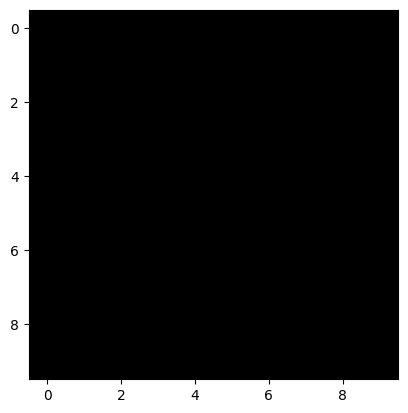

In [5]:
x = np.zeros(100).reshape(10,10)
plt.imshow(x, cmap = 'gray')

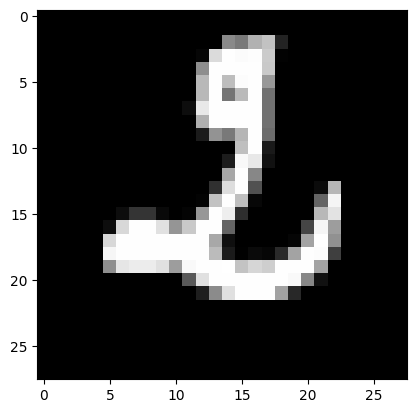

In [6]:
plt.imshow(x_train[190], cmap='gray')

In [7]:
y_train[190]

2

Text(0.5, 1.0, '2')

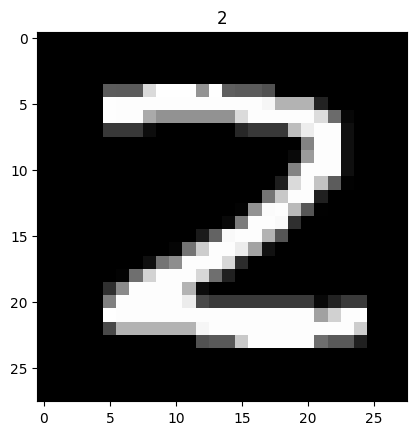

In [8]:
plt.imshow(x_train[220], cmap='gray')
plt.title(y_train[220])

In [9]:
x = np.array([[2,3,5],[8,9,0]])
x

array([[2, 3, 5],
       [8, 9, 0]])

In [10]:
x.shape

(2, 3)

In [11]:
x = x.flatten()
x

array([2, 3, 5, 8, 9, 0])

In [12]:
x.shape

(6,)

In [13]:
img = x_train[3]

In [14]:
img.shape

(28, 28)

In [15]:
img = img.flatten()
img.shape

(784,)

In [16]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [17]:
x_train.shape

(60000, 784)

In [18]:
x = np.array([6,4,2,0,4,5])

In [19]:
x/6

array([1.        , 0.66666667, 0.33333333, 0.        , 0.66666667,
       0.83333333])

In [20]:
# convert the values in between 0 to 1

x_train = x_train/255
x_test = x_test/255

In [21]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [22]:
import seaborn as sns

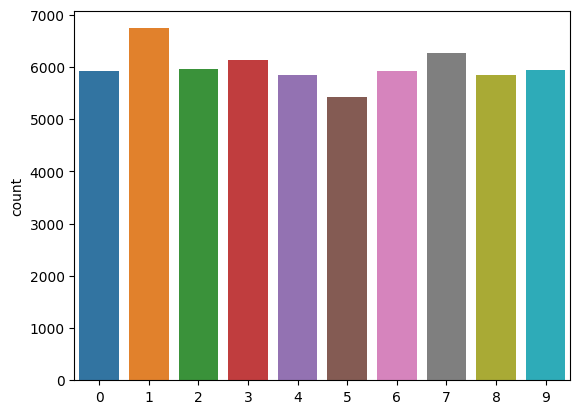

In [23]:
# frequency of a particular imagefrom collections import Counter
Counter(y_train)
sns.countplot(x = y_train);

In [24]:
from collections import Counter
Counter(y_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [25]:
from keras.utils import to_categorical

In [26]:
x = [0,2,2,1,0,2]

In [27]:
to_categorical(x)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [28]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
y_train.shape

(60000, 10)

In [30]:
y_test.shape

(10000, 10)

In [31]:
#N/W Architecture

In [32]:
# object of neural network
model = Sequential()

# input layer
model.add(Dense(784, input_shape=(784,),
               activation='relu'))

# hidden layer -1
model.add(Dense(256, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 818970 (3.12 MB)
Trainable params: 818970 (3.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
#compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics= ['accuracy'])

In [35]:
#train the model
history = model.fit(x_train, y_train, epochs = 10, batch_size= 10)

Epoch 1/10
6000/6000 [==============================] - 89s 15ms/step - loss: 0.1876 - accuracy: 0.9436
Epoch 2/10
6000/6000 [==============================] - 91s 15ms/step - loss: 0.0915 - accuracy: 0.9723
Epoch 3/10
6000/6000 [==============================] - 88s 15ms/step - loss: 0.0676 - accuracy: 0.9798
Epoch 4/10
6000/6000 [==============================] - 88s 15ms/step - loss: 0.0559 - accuracy: 0.9837
Epoch 5/10
6000/6000 [==============================] - 84s 14ms/step - loss: 0.0466 - accuracy: 0.9863
Epoch 6/10
6000/6000 [==============================] - 86s 14ms/step - loss: 0.0383 - accuracy: 0.9890
Epoch 7/10
6000/6000 [==============================] - 87s 14ms/step - loss: 0.0380 - accuracy: 0.9894
Epoch 8/10
6000/6000 [==============================] - 85s 14ms/step - loss: 0.0357 - accuracy: 0.9905
Epoch 9/10
6000/6000 [==============================] - 83s 14ms/step - loss: 0.0330 - accuracy: 0.9915
Epoch 10/10
6000/6000 [==============================] - 91s 15m

In [36]:
history.history

{'loss': [0.18756166100502014,
  0.09151805937290192,
  0.06756773591041565,
  0.05592239275574684,
  0.04662672430276871,
  0.038295678794384,
  0.03800385445356369,
  0.03565971925854683,
  0.0330251045525074,
  0.031476929783821106],
 'accuracy': [0.9436166882514954,
  0.9722833037376404,
  0.9797999858856201,
  0.9836666584014893,
  0.9862833619117737,
  0.9890166521072388,
  0.9894333481788635,
  0.9904999732971191,
  0.9914666414260864,
  0.9918500185012817]}

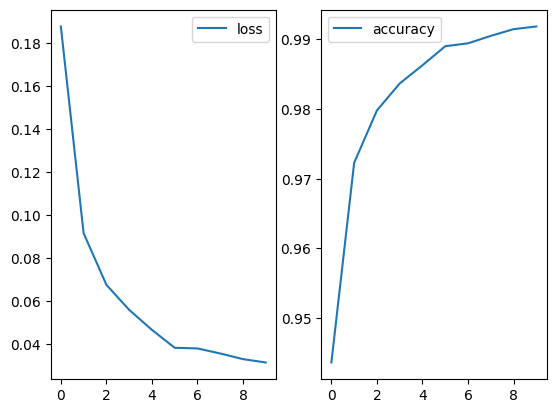

In [37]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()

In [38]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 26s 3ms/step - loss: 0.1304 - accuracy: 0.9796


[0.13040749728679657, 0.9796000123023987]